Подготовка окружения и загрузка данных

In [1]:
# Установим необходимые библиотеки
!pip install -U scikit-learn
!pip install nltk
!pip install matplotlib

# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Скачаем набор данных IMDb
nltk.download('movie_reviews')

# Подготовим данные
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Создадим DataFrame из данных
df = pd.DataFrame(documents, columns=['text', 'sentiment'])

# Разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Определение функций для классификации и оценки

In [2]:
# Определим функцию для классификации и оценки
def classify_and_evaluate(vectorizer, X_train, X_test, y_train, y_test):
    # Извлечение признаков
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Обучение модели
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)

    # Прогнозирование
    y_pred = model.predict(X_test_vec)

    # Оценка
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy, confusion

# Определим функцию для визуализации матрицы ошибок
def plot_confusion_matrix(confusion_matrix):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Матрица ошибок')
    plt.colorbar()
    plt.xlabel('Предсказанная метка')
    plt.ylabel('Истинная метка')
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['негатив', 'позитив'])
    plt.yticks(tick_marks, ['негатив', 'позитив'])
    thresh = confusion_matrix.max() / 2.
    for i, j in [(i, j) for i in range(confusion_matrix.shape[0]) for j in range(confusion_matrix.shape[1])]:
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()


Классификация с использованием CountVectorizer

Используем CountVectorizer:
Точность: 0.83
Матрица ошибок:
 [[168  31]
 [ 37 164]]


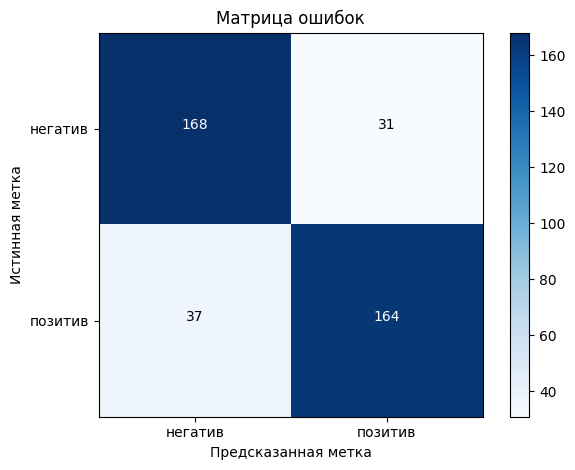

In [3]:
# Используем CountVectorizer
print("Используем CountVectorizer:")
count_vectorizer = CountVectorizer()
accuracy_count, confusion_count = classify_and_evaluate(count_vectorizer, X_train, X_test, y_train, y_test)
print("Точность:", accuracy_count)
print("Матрица ошибок:\n", confusion_count)
plot_confusion_matrix(confusion_count)


Классификация с использованием TfidfVectorizer

Используем TfidfVectorizer:
Точность: 0.81
Матрица ошибок:
 [[162  37]
 [ 39 162]]


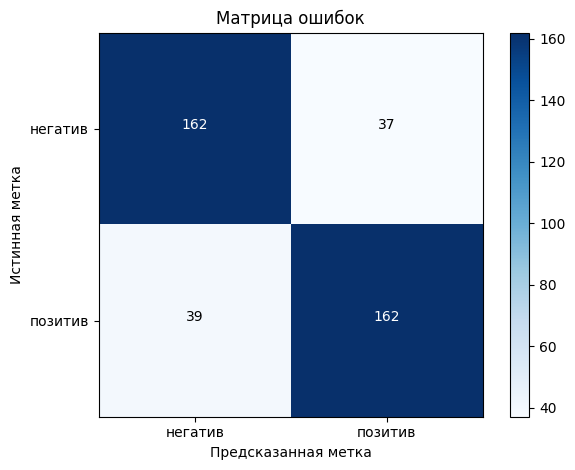

In [4]:
# Используем TfidfVectorizer
print("Используем TfidfVectorizer:")
tfidf_vectorizer = TfidfVectorizer()
accuracy_tfidf, confusion_tfidf = classify_and_evaluate(tfidf_vectorizer, X_train, X_test, y_train, y_test)
print("Точность:", accuracy_tfidf)
print("Матрица ошибок:\n", confusion_tfidf)
plot_confusion_matrix(confusion_tfidf)


Классификация с использованием Word2Vec

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Используем Word2Vec:
Точность: 0.73
Матрица ошибок:
 [[152  47]
 [ 61 140]]


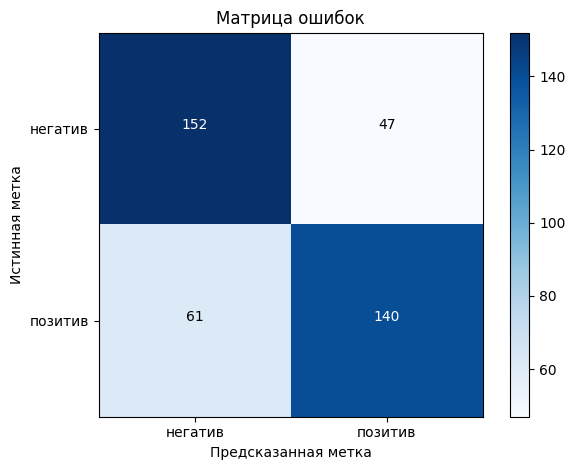

In [5]:
# Установим необходимые библиотеки
!pip install gensim

# Импортируем необходимые библиотеки
import gensim.downloader as api

# Загрузим предварительно обученную модель Word2Vec
word2vec_model = api.load('word2vec-google-news-300')

# Определим функцию для преобразования текста в представление Word2Vec
def text_to_w2v(text):
    word_vectors = [word2vec_model[word] for word in text.split() if word in word2vec_model]
    if len(word_vectors) == 0:
        return np.zeros(300)  # Если текст пустой, вернем вектор из нулей
    return np.mean(word_vectors, axis=0)  # Вернем среднее значение векторов слов как представление текста

# Преобразуем текст в представление Word2Vec
X_train_w2v = np.array([text_to_w2v(text) for text in X_train])
X_test_w2v = np.array([text_to_w2v(text) for text in X_test])

# Используем модель логистической регрессии для классификации
model_w2v = LogisticRegression(max_iter=1000)
model_w2v.fit(X_train_w2v, y_train)

# Прогнозирование
y_pred_w2v = model_w2v.predict(X_test_w2v)

# Оценка
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
confusion_w2v = confusion_matrix(y_test, y_pred_w2v)

print("Используем Word2Vec:")
print("Точность:", accuracy_w2v)
print("Матрица ошибок:\n", confusion_w2v)
plot_confusion_matrix(confusion_w2v)
